In [0]:
import calendar
import time
#!pip install unicodecsv
import unicodecsv
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm
from string import ascii_letters
import datetime, warnings, scipy 
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns
pd.options.display.max_rows
plt.style.use('bmh')
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))
%matplotlib inline
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4f}'.format

In [18]:
#start_time = time.time()
#(code below)

flights = pd.read_pickle('flights.pkl') #read and load saved dataframe to continued analysis
display(flights.shape)

#print("--- %.2f minutes runtime ---"% ((time.time() - start_time)/60))

(2673761, 67)

In [19]:
display(flights.columns,flights.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2673761 entries, 0 to 2673760
Data columns (total 67 columns):
YEAR                     int64
QUARTER                  int64
MONTH                    int64
DAY_OF_MONTH             int64
DAY_OF_WEEK              int64
FL_DATE                  object
OP_UNIQUE_CARRIER        object
OP_CARRIER_AIRLINE_ID    int64
OP_CARRIER               object
OP_CARRIER_FL_NUM        int64
ORIGIN_AIRPORT_ID        int64
ORIGIN_AIRPORT_SEQ_ID    int64
ORIGIN_CITY_MARKET_ID    int64
ORIGIN                   object
ORIGIN_CITY_NAME         object
ORIGIN_STATE_ABR         object
ORIGIN_STATE_NM          object
DEST_AIRPORT_ID          int64
DEST_AIRPORT_SEQ_ID      int64
DEST_CITY_MARKET_ID      int64
DEST                     object
DEST_CITY_NAME           object
DEST_STATE_ABR           object
DEST_STATE_NM            object
CRS_DEP_TIME             int64
DEP_TIME                 float64
DEP_DELAY                float64
DEP_DELAY_NEW            float64
DE

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER',
       'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID',
       'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_NM', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP',
       'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN',
       'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15',
       'ARR_DELAY_GROUP', 'ARR_TIME_BLK', 'CANCELLED', 'CANCELLATION_CODE',
       'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME',
       'FLIGHTS', 'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_D

None

### TEAM DECISION
- Limit departure delays to be less than 3 hour and greater than 0 mins (Realistic data) - Elimination of outliers
- Set all other major analysis delays to be greater than 0
    - These outliers skew the dataset

In [20]:
start_time = time.time()
#(code below)
Orig_flights = flights.copy()

flights = flights[flights['ARR_DELAY']>=0]
flights = flights[flights['ARR_DEL15']>=0]
flights = flights.query("(DEP_DELAY>= 0) and (DEP_DELAY <= 180)")
flights = flights[flights['CARRIER_DELAY']>=0]
flights = flights[flights['NAS_DELAY']>=0]
flights = flights[flights['WEATHER_DELAY']>=0]
flights = flights[flights['SECURITY_DELAY']>=0]
flights = flights[flights['LATE_AIRCRAFT_DELAY']>=0]

print("--- %.2f minutes ---"% ((time.time() - start_time)/60))

--- 0.15 minutes ---


####  Difference of original flight data minus values above zero and below 180 mins in delays

In [21]:
A = (2673761-(len(flights)))
A

408024

In [0]:
#correlation matrix
#%time corrmat = flights.corr()
#f, ax = plt.subplots(figsize=(12, 9))
#sns.heatmap(corrmat, vmax=.8, square=True);
#plt.show()

In [23]:
start_time = time.time()
#(code below)
#Correlation 

corr = flights.corr()
#https://datascienceplus.com/visualize-correlation-matrices-in-python/
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

print("--- %.2f minutes ---"% ((time.time() - start_time)/60))

--- 0.20 minutes ---


--- 0.01 minutes ---


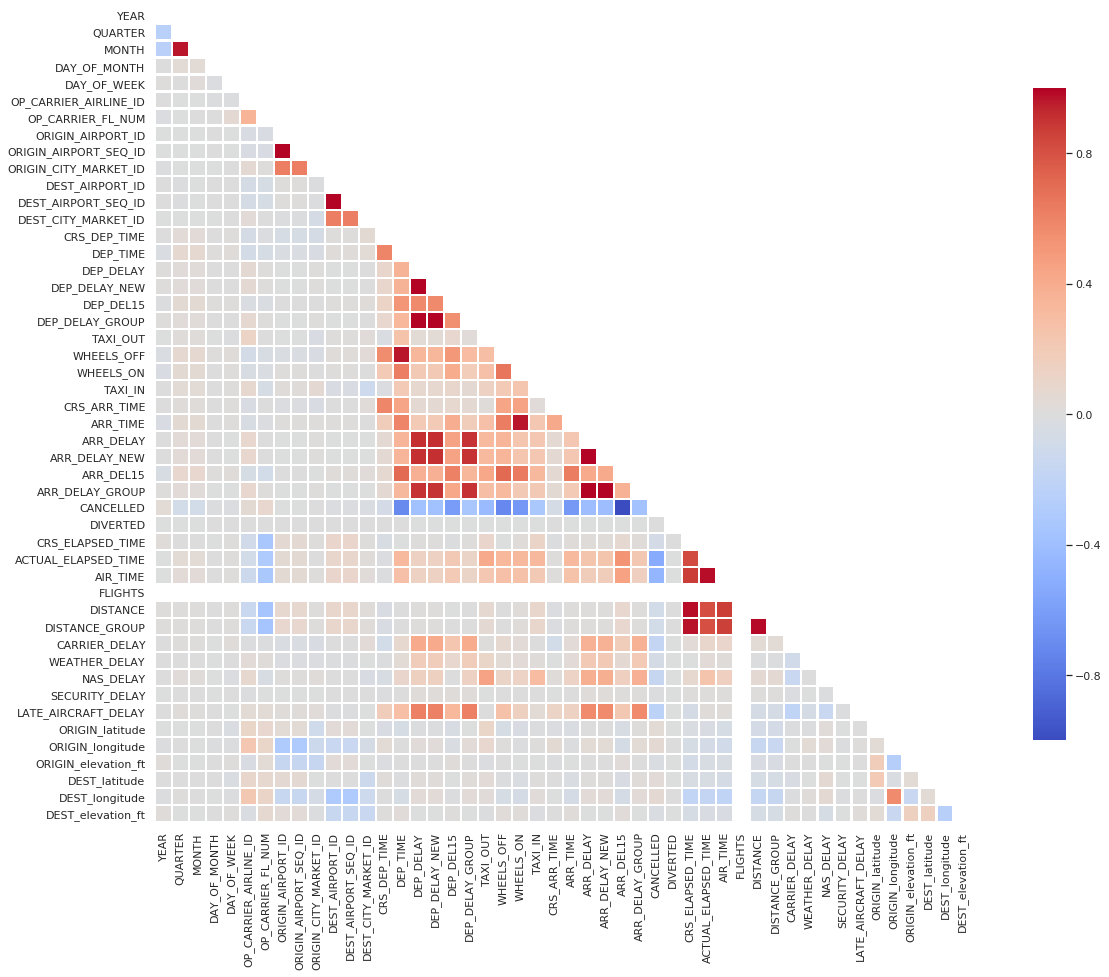

In [24]:
start_time = time.time()
from string import ascii_letters

sns.set(style="whitegrid")

#####
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(709, 201, as_cmap=True)
cmap=sns.diverging_palette(5, 250, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1.0, center=0,
            square=True, linewidths=1.2, cbar_kws={"shrink": .8})
#cmap=cmap

print("--- %.2f minutes ---"% ((time.time() - start_time)/60))

Through the correlation matrix we can see how some of the variables in the dataset present multicollinearity, in other words, can be linearly predicted from the others. 
To have a better analysis and work with a lighter dataset, we are going to delete some of those unwanted variables and create new ones.
We can also make the following observations:
1. When Arrival Delay is longer than 15 minutes, there's data about what caused the delay. 
Arrival Delay is the sum of CarrierDelay, WeatherDelay, NASDelay and LateAircraftDelay. In cases of cancellation or diversion there's no data related to delay causes.
2. Airports and carriers allocate a CRSElapsedTime higher than the actual time spent in the Taxi In + Taxi out + Airtime operations (Actual Elapsed Time). 
This is the reason when planes take off on time, landing usually takes place before the expected time! It also allows to absorb delay by late aircraft down the lane of chained flights.

In [25]:
#Count of Carriers within Dataset (Largest to smallest)
CC = flights['carrier_name'].value_counts().reset_index()
CC.rename(columns = {'index':'carrier_name', 'carrier_name':'count'}, inplace = True) 
CC

,carrier_name,count
0,Southwest Airlines Co.,455952
1,American Airlines Inc.,312015
2,SkyWest Airlines Inc.,235560
3,Delta Air Lines Inc.,202551
4,United Air Lines Inc.,186336
5,JetBlue Airways,125416
6,Envoy Air,110068
7,PSA Airlines Inc.,102696
8,Republic Airline,96940
9,Mesa Airlines Inc.,74405


In [26]:
fig = px.bar(CC, x='carrier_name', y='count',
            hover_data=['carrier_name', 'count'], color='carrier_name', height=600)

fig.update_layout(title={'text': "<b>Overall Delayed Flights Data-Set<b>", 'y':0.98,'x':0.45,'xanchor': 'center','yanchor': 'top'},
                 xaxis_title="<b>Carrier Names<b>")
title_text=dict(x=10,y=1.0)
fig.show()

Text(0.5, 1.0, 'Overall Delayed Flights Data-Set')

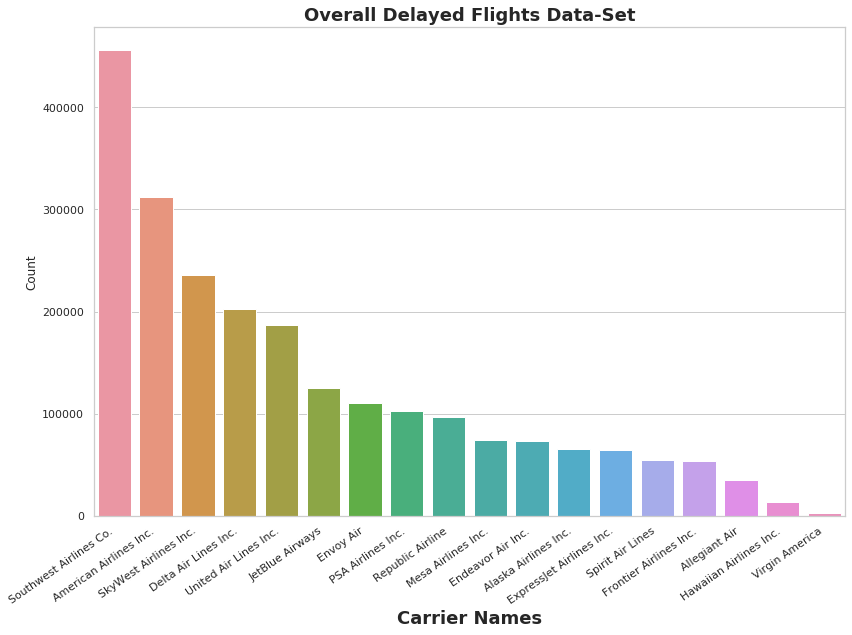

In [27]:
#Number of scheduled delayed  flight within dataset for each airline carrier
plt.figure(figsize=(12,9))
sns.barplot(x='carrier_name', y='count', data=CC)
plt.xlabel('Carrier Names', fontdict={'fontsize': 18, 'fontweight': 'extra bold'})
plt.ylabel('Count')
plt.xticks(rotation=35,  ha='right')
plt.title('Overall Delayed Flights Data-Set', fontdict={'fontsize': 18, 'fontweight': 'extra bold'})

#The fontdict except all kwargs from --> https://matplotlib.org/api/text_api.html#matplotlib.text.Text

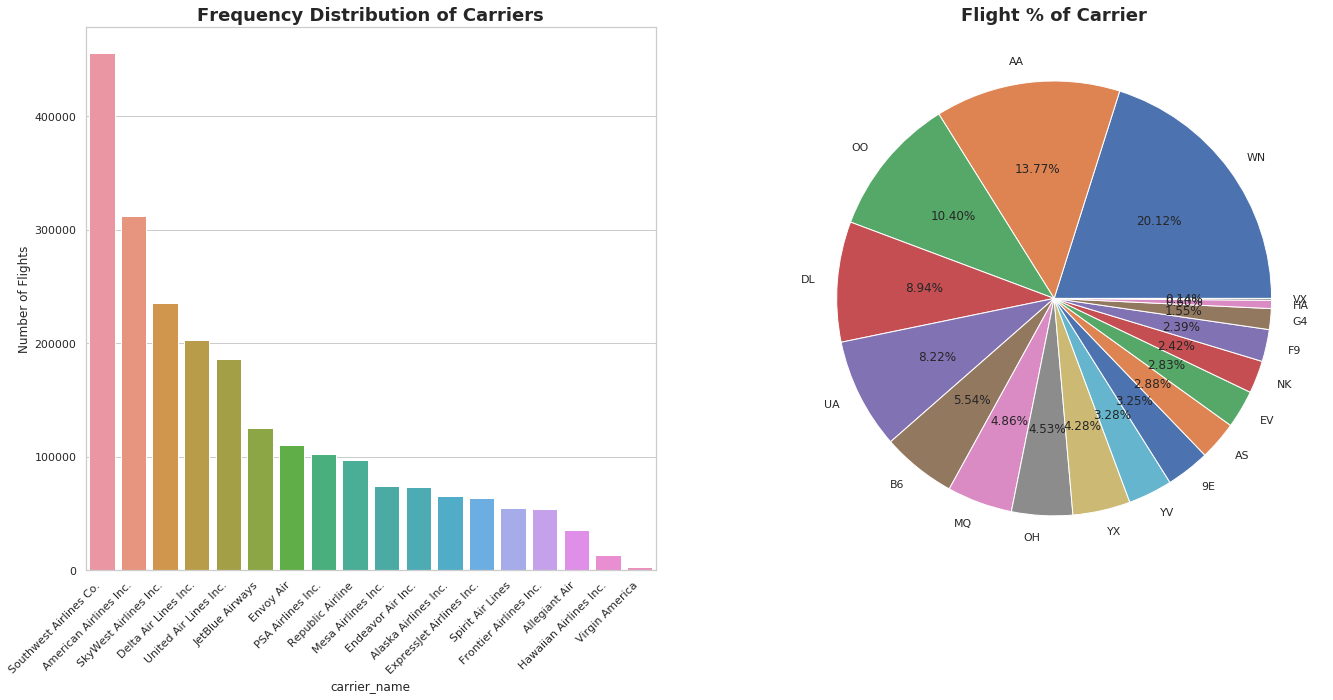

In [28]:
#Graphical representation of carriers scheduled flights in numbers and %

f,ax=plt.subplots(1,2,figsize=(20,10))
flights['OP_CARRIER'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[1],shadow=False)                                                  
ax[1].set_title('Flight % of Carrier',fontdict={'fontsize': 18, 'fontweight': 'extra bold'})
ax[1].set_ylabel('')
sns.countplot('carrier_name',order = flights['carrier_name'].value_counts().index, data=flights,ax=ax[0])
ax[0].set_title('Frequency Distribution of Carriers', fontdict={'fontsize': 18, 'fontweight': 'extra bold'})
ax[0].set_ylabel('Number of Flights')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [0]:
#(flights.ARR_DELAY/flights.groupby(['carrier_name']).transform(sum))['ARR_DELAY']
#flights['%_ARR_DELAY'] = 100 * flights['ARR_DELAY'] / flights.groupby('carrier_name')['ARR_DELAY'].transform('sum')
#flights.groupby(['carrier_name'])['ARR_DELAY'].mean().transform(lambda x: x/np.sum(x)*100)
#Percentage goruping - search google - groupby percentage pandas

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


Text(0.5, 1.0, 'Top Ten Carriers - Average Arrival Delays')

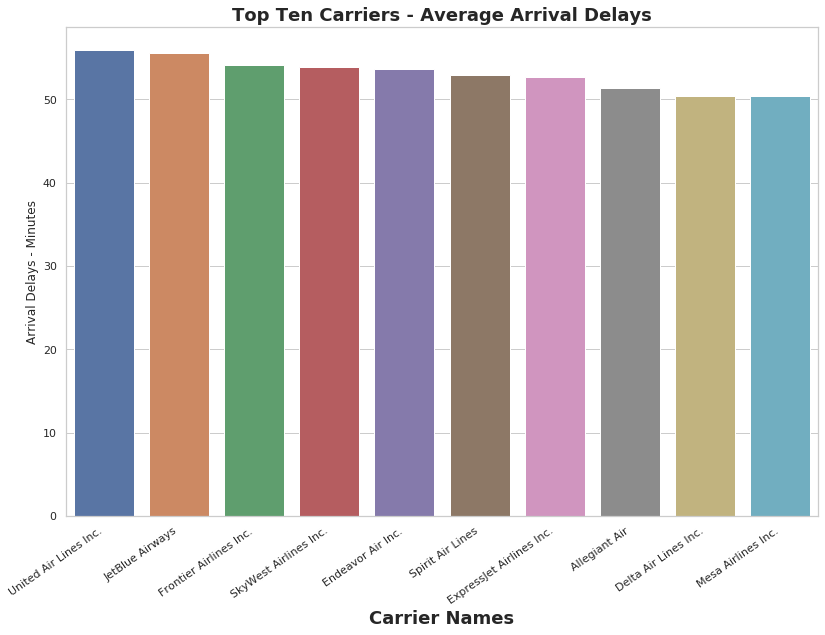

In [30]:
#Top Carrier with arrival delays
#arr_delay, security_delay
%time 
CD = flights.groupby(['carrier_name'])['ARR_DELAY'].mean().nlargest(10).reset_index()
plt.figure(figsize=(12,9))
sns.barplot(x='carrier_name', y='ARR_DELAY', data=CD)
plt.ylabel('Arrival Delays - Minutes')
plt.xlabel('Carrier Names', fontdict={'fontsize': 18, 'fontweight': 'extra bold'})

plt.xticks(rotation=35,  ha='right')
plt.title('Top Ten Carriers - Average Arrival Delays', fontdict={'fontsize': 18, 'fontweight': 'extra bold'})

In [31]:
fig = px.bar(CD, x='carrier_name', y='ARR_DELAY',
            hover_data=['carrier_name', 'ARR_DELAY'], color='carrier_name', height=600)

fig.update_layout(title={'text': "<b>Top Ten Carriers - Average Arrival Delays<b>", 'y':0.98,'x':0.45,'xanchor': 'center','yanchor': 'top'},
                 xaxis_title="<b>Carrier Names<b>",
                 yaxis_title="<b>Arrival Delays - Minutes<b>")
title_text=dict(x=10,y=1.0)
fig.show()

--- 0.2588 seconds ---


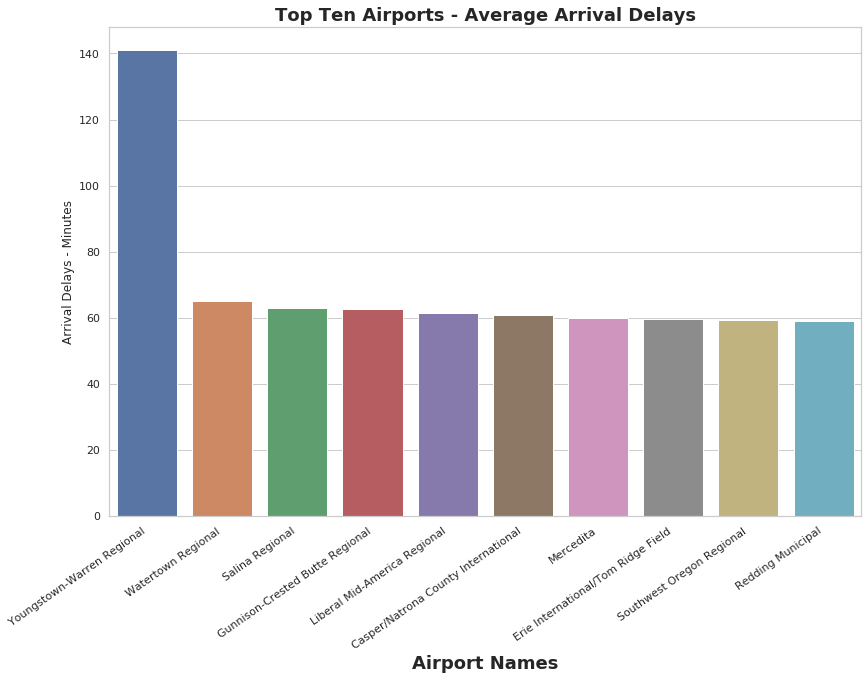

In [32]:
start_time = time.time()
#ARR_DELAY
#Top Airports with arrival delays
AD = flights.groupby(['ORIGIN_AirportName'])['ARR_DELAY'].mean().nlargest(10).reset_index()
plt.figure(figsize=(12,9))
sns.barplot(x='ORIGIN_AirportName', y='ARR_DELAY', data=AD)
plt.ylabel('Arrival Delays - Minutes')
plt.xlabel('Airport Names', fontdict={'fontsize': 18, 'fontweight': 'extra bold'})

plt.xticks(rotation=35,  ha='right')
plt.title('Top Ten Airports - Average Arrival Delays', fontdict={'fontsize': 18, 'fontweight': 'extra bold'})

print("--- %.4f seconds ---"% (time.time() - start_time))

In [33]:
fig = px.bar(AD, x='ORIGIN_AirportName', y='ARR_DELAY', color='ORIGIN_AirportName', height=600)

fig.update_layout(title={'text': "<b>Top Ten Airports - Average Arrival Delays<b>", 'y':0.98,'x':0.45,'xanchor': 'center','yanchor': 'top'},
                 xaxis_title="<b>Airport Names<b>",
                 yaxis_title="<b>Arrival Delays - Minutes<b>")
fig.update_xaxes(tickangle=15, tickfont=dict( size=14))
#fig.update_xaxes(tickangle=45, tickfont=dict(family='Rockwell', color='crimson', size=14))
title_text=dict(x=8,y=1.0)
fig.show()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


Text(0.5, 1.0, 'Top Ten Carriers - Average Departure Delays')

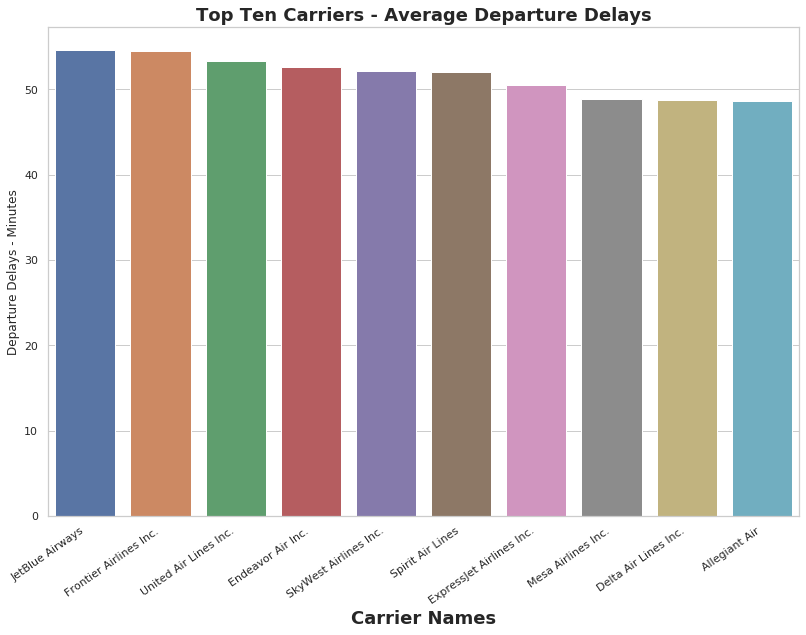

In [34]:
#Top Carrier with Depature Delays
%time 
DD = flights.groupby(['carrier_name'])['DEP_DELAY'].mean().nlargest(10).reset_index()
plt.figure(figsize=(12,9))
sns.barplot(x='carrier_name', y='DEP_DELAY', data=DD)
plt.ylabel('Departure Delays - Minutes')
plt.xlabel('Carrier Names', fontdict={'fontsize': 18, 'fontweight': 'extra bold'})

plt.xticks(rotation=35,  ha='right')
plt.title('Top Ten Carriers - Average Departure Delays', fontdict={'fontsize': 18, 'fontweight': 'extra bold'})

In [35]:
DD.columns

Index(['carrier_name', 'DEP_DELAY'], dtype='object')

In [36]:

fig = px.bar(DD, x='carrier_name', y='DEP_DELAY',
            hover_data=['carrier_name', 'DEP_DELAY'], color='carrier_name',
             labels={'DEP_DELAY':'Departure Delay'}, height=600)

fig.update_layout(title_text='Departure Delays by Air Carriers', 
                  title={'text': "<b>Departure Delays by Air Carriers<b>",
                         'y':0.98,'x':0.45,'xanchor': 'center','yanchor': 'top'})
title_text=dict(x=10,y=1.0)
fig.show()
#https://plot.ly/python/bar-charts/

In [37]:
#Top Airports with Departure Delays
%time 
ADD = flights.groupby(['ORIGIN_AirportName'])['DEP_DELAY'].mean().nlargest(10).reset_index()
fig = px.bar(ADD, x='ORIGIN_AirportName', y='DEP_DELAY',
            hover_data=['ORIGIN_AirportName', 'DEP_DELAY'], color='ORIGIN_AirportName',
             labels={'DEP_DELAY':'Departure Delay Time'}, height=600)

fig.update_layout(title_text='Departure Delays by Airports', 
                  title={'text': "Departure Delays by Airports",
                         'y':0.98,'x':0.45,'xanchor': 'center','yanchor': 'top'})
title_text=dict(x=10,y=1.0)
fig.show()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs


Text(0.5, 1.0, 'Top Ten Carriers - Average Security Delays')

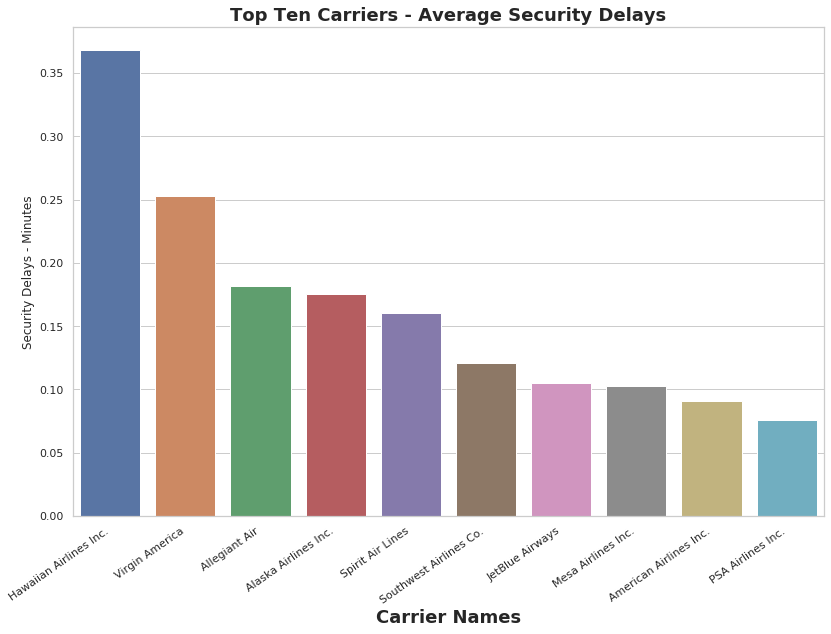

In [38]:
#Top Carrier with security delays
#--> show values greater than
SD = flights.groupby(['carrier_name'])['SECURITY_DELAY'].mean().nlargest(10).reset_index()
plt.figure(figsize=(12,9))
sns.barplot(x='carrier_name', y='SECURITY_DELAY', data=SD)
plt.xlabel('Carrier Names', fontdict={'fontsize': 18, 'fontweight': 'extra bold'})
plt.ylabel('Security Delays - Minutes')


plt.xticks(rotation=35,  ha='right')
plt.title('Top Ten Carriers - Average Security Delays', fontdict={'fontsize': 18, 'fontweight': 'extra bold'})

#flights['OP_CARRIER'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[1],shadow=False) 


CPU times: user 5.67 ms, sys: 73 µs, total: 5.75 ms
Wall time: 5.95 ms
CPU times: user 44.3 ms, sys: 6 µs, total: 44.3 ms
Wall time: 44.1 ms


Text(0.5, 1.0, 'Top Ten Carriers - Average Security Delays')

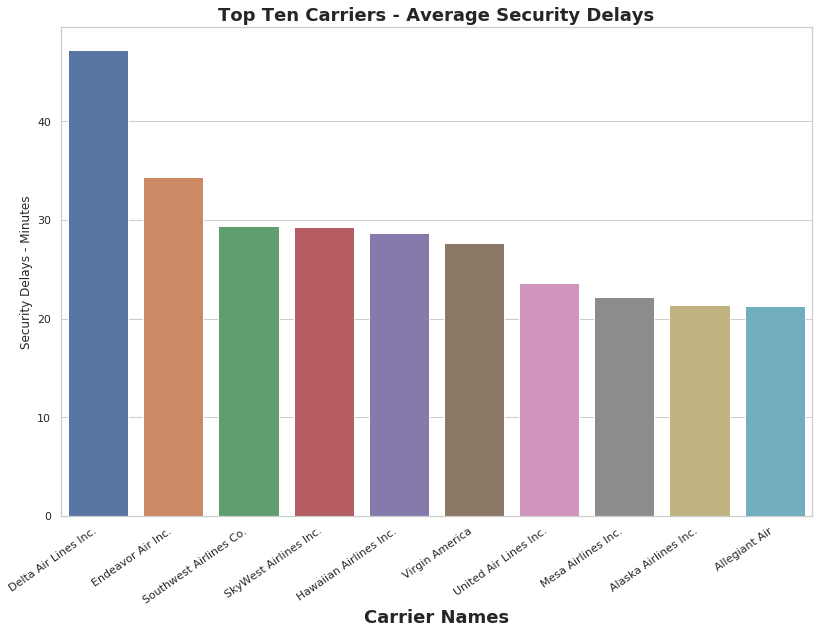

In [39]:
#Top Carrier with security delays
#--> show values greater than
SD_2 = flights[flights['SECURITY_DELAY'] > 0] #SUBSETTED DATA FOR SECURITY

%time  SD_4 = SD_2.groupby(['carrier_name'])['SECURITY_DELAY'].mean().nlargest(10).reset_index()
plt.figure(figsize=(12,9))
%time  sns.barplot(x='carrier_name', y='SECURITY_DELAY', data=SD_4)
plt.xlabel('Carrier Names', fontdict={'fontsize': 18, 'fontweight': 'extra bold'})
plt.ylabel('Security Delays - Minutes')


plt.xticks(rotation=35,  ha='right')
plt.title('Top Ten Carriers - Average Security Delays', fontdict={'fontsize': 18, 'fontweight': 'extra bold'})



In [40]:
SD1 = flights.groupby(['carrier_name'])
SD1=SD1[['SECURITY_DELAY']].sum().add_prefix('%_of_')
SD1 = SD1.apply(lambda x:(x/x.sum()*100)).reset_index()
SD1 = SD1.sort_values(by=['%_of_SECURITY_DELAY'], ascending=False).reset_index()
SD1.drop(['index'], inplace=True, axis=1)
SD1

,carrier_name,%_of_SECURITY_DELAY
0,Southwest Airlines Co.,30.4527
1,American Airlines Inc.,15.6313
2,SkyWest Airlines Inc.,7.9762
3,JetBlue Airways,7.2806
4,Alaska Airlines Inc.,6.3286
5,Delta Air Lines Inc.,5.8407
6,Spirit Air Lines,4.8738
7,PSA Airlines Inc.,4.3213
8,Mesa Airlines Inc.,4.2218
9,Allegiant Air,3.5234


CPU times: user 70.9 ms, sys: 2.2 ms, total: 73.1 ms
Wall time: 71.3 ms


Text(0.5, 1.0, 'Top Ten Carriers - Security Delays Percentage')

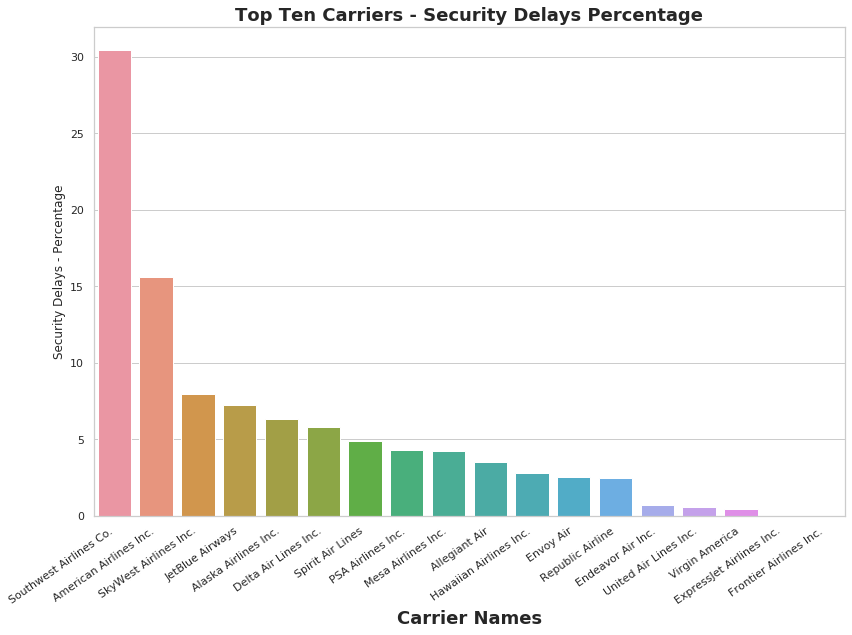

In [41]:
plt.figure(figsize=(12,9))
%time  sns.barplot(x='carrier_name', y='%_of_SECURITY_DELAY', data=SD1)
plt.xlabel('Carrier Names', fontdict={'fontsize': 18, 'fontweight': 'extra bold'})
plt.ylabel('Security Delays - Percentage')

plt.xticks(rotation=35,  ha='right')
plt.title('Top Ten Carriers - Security Delays Percentage', fontdict={'fontsize': 18, 'fontweight': 'extra bold'})

Text(0.5, 1.0, 'Top Ten Airports - Average Security Delays')

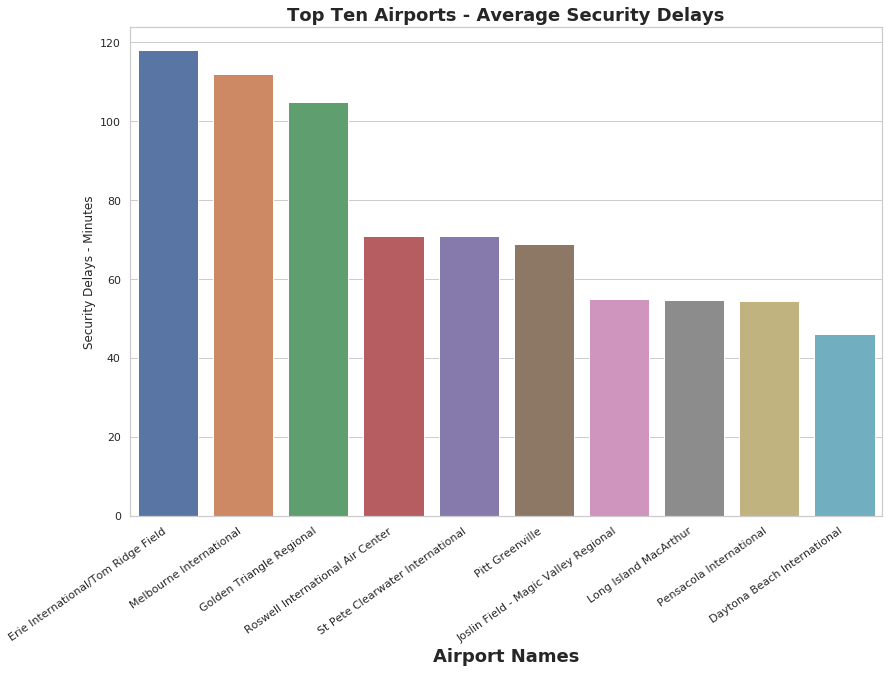

In [42]:
#Top Airports with arrival delays
ASD = SD_2.groupby(['ORIGIN_AirportName'])['SECURITY_DELAY'].mean().nlargest(10).reset_index()
plt.figure(figsize=(12,9))
sns.barplot(x='ORIGIN_AirportName', y='SECURITY_DELAY', data=ASD)
plt.ylabel('Security Delays - Minutes')
plt.xlabel('Airport Names', fontdict={'fontsize': 18, 'fontweight': 'extra bold'})
plt.xticks(rotation=35,  ha='right')
plt.title('Top Ten Airports - Average Security Delays',fontdict={'fontsize': 18, 'fontweight': 'extra bold'})

Text(0.5, 1.0, 'Top Ten Airports - Security Delays - Percentage')

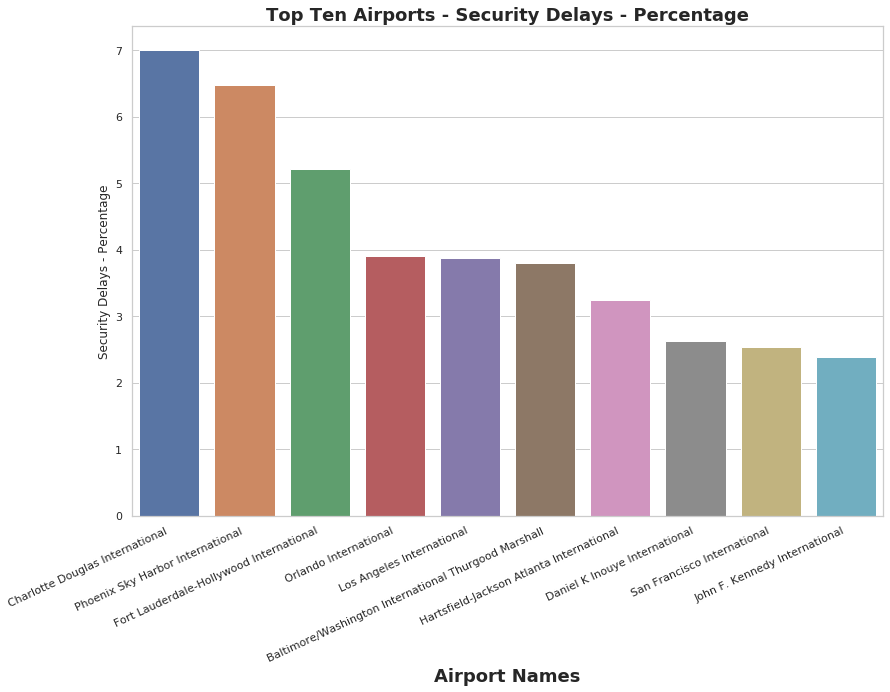

In [43]:
ASD1 = flights.groupby(['ORIGIN_AirportName'])
ASD1=ASD1[['SECURITY_DELAY']].sum().add_prefix('%_of_')
ASD1 = ASD1.apply(lambda x:(x/x.sum()*100)).reset_index()
ASD1 = ASD1.sort_values(by=['%_of_SECURITY_DELAY'], ascending=False).reset_index()
ASD1 = ASD1.nlargest(10, '%_of_SECURITY_DELAY', keep='last')
ASD1.drop(['index'], inplace=True, axis=1)

plt.figure(figsize=(12,9))
sns.barplot(x='ORIGIN_AirportName', y='%_of_SECURITY_DELAY', data=ASD1)
plt.ylabel('Security Delays - Percentage')
plt.xlabel('Airport Names', fontdict={'fontsize': 18, 'fontweight': 'extra bold'})
plt.xticks(rotation=25,  ha='right')
plt.title('Top Ten Airports - Security Delays - Percentage',fontdict={'fontsize': 18, 'fontweight': 'extra bold'})

Text(0.5, 1.0, 'Top Months of Delays - Average Security Delays')

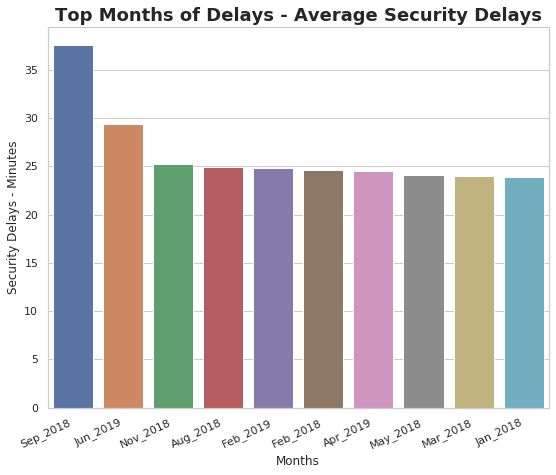

In [44]:
#Top Months with security delays
MASD = SD_2.groupby(['MY'])['SECURITY_DELAY'].mean().nlargest(10).reset_index()
plt.figure(figsize=(8,7))
sns.barplot(x='MY', y='SECURITY_DELAY', data=MASD)
plt.ylabel('Security Delays - Minutes')
plt.xlabel('Months')
plt.xticks(rotation=25,  ha='right')
plt.title('Top Months of Delays - Average Security Delays',fontdict={'fontsize': 18, 'fontweight': 'extra bold'})

Text(0.5, 1.0, 'Top Months of Security Delays - Percentage')

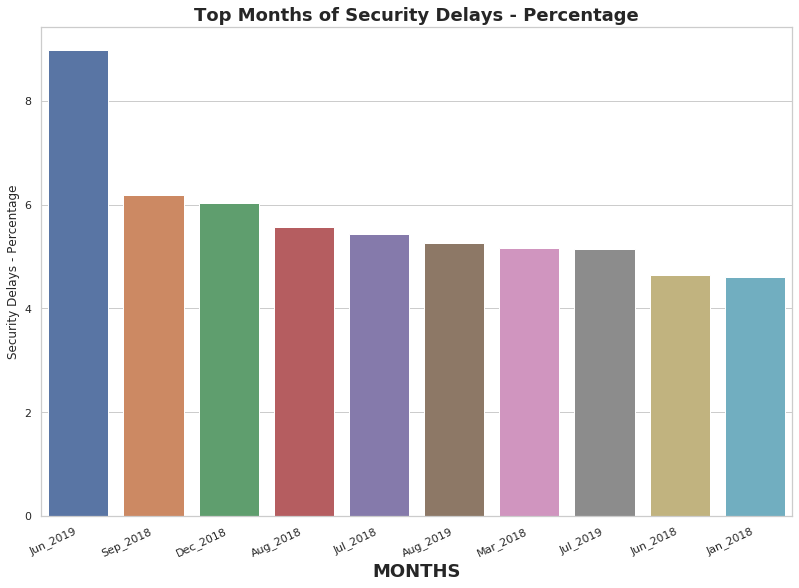

In [45]:
#Top Months with security delays Percentage
MASD1 = flights.groupby(['MY'])
MASD1=MASD1[['SECURITY_DELAY']].sum().add_prefix('%_of_')
MASD1 = MASD1.apply(lambda x:(x/x.sum()*100)).reset_index()
MASD1 = MASD1.sort_values(by=['%_of_SECURITY_DELAY'], ascending=False).reset_index()
MASD1 = MASD1.nlargest(10, '%_of_SECURITY_DELAY', keep='last')
MASD1.drop(['index'], inplace=True, axis=1)

plt.figure(figsize=(12,9))
sns.barplot(x='MY', y='%_of_SECURITY_DELAY', data=MASD1)
plt.ylabel('Security Delays - Percentage')
plt.xlabel('MONTHS', fontdict={'fontsize': 18, 'fontweight': 'extra bold'})
plt.xticks(rotation=25,  ha='right')
plt.title('Top Months of Security Delays - Percentage',fontdict={'fontsize': 18, 'fontweight': 'extra bold'})

In [46]:
#Top Carriers with weather delays
CWD_1 = flights[flights['WEATHER_DELAY'] > 0] #SUBSETTED DATA FOR WEATHER
CWD = CWD_1.groupby(['carrier_name'])['WEATHER_DELAY'].mean().nlargest(10).reset_index()
fig = px.bar(CWD, x='carrier_name', y='WEATHER_DELAY',
            hover_data=['carrier_name', 'WEATHER_DELAY'], color='carrier_name',
             labels={'WEATHER_DELAY':'Weather Delay'}, height=600)

fig.update_layout(title_text='Top Air Carriers with Most Weather Delays', 
                  title={'text': "Top Air Carriers with Most Weather Delays",
                         'y':0.98,'x':0.45,'xanchor': 'center','yanchor': 'top'})
title_text=dict(x=10,y=1.0)
fig.show()

Text(0.5, 1.0, 'Top Months of Delays - Average Weather Delays')

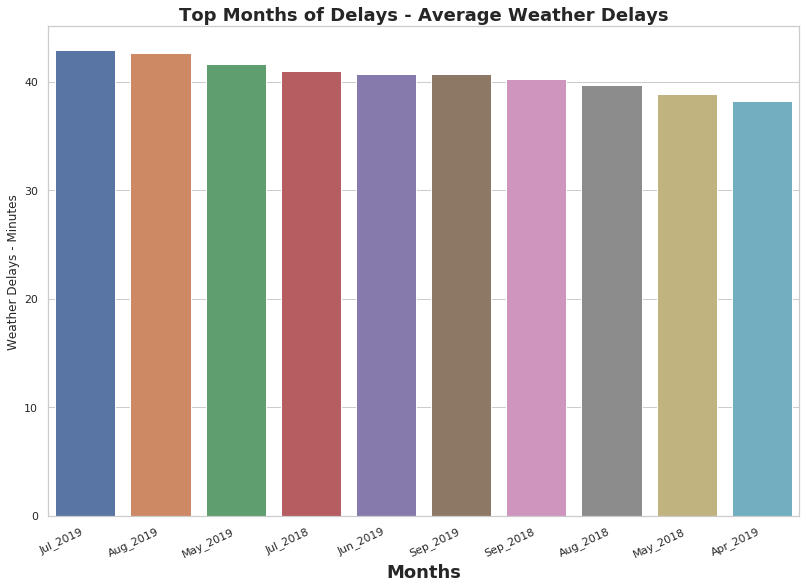

In [47]:
#Top Months with weather delays
WD_1 = flights[flights['WEATHER_DELAY'] > 0] #SUBSETTED DATA to show realistic numbers
MAWD = WD_1.groupby(['MY'])['WEATHER_DELAY'].mean().nlargest(10).reset_index()
plt.figure(figsize=(12,9))
sns.barplot(x='MY', y='WEATHER_DELAY', data=MAWD)
plt.ylabel('Weather Delays - Minutes')
plt.xlabel('Months', fontdict={'fontsize': 18, 'fontweight': 'extra bold'})
plt.xticks(rotation=25,  ha='right')
plt.title('Top Months of Delays - Average Weather Delays',fontdict={'fontsize': 18, 'fontweight': 'extra bold'})

Text(0.5, 1.0, 'Top Months of Delays - Weather Delays - Percentage')

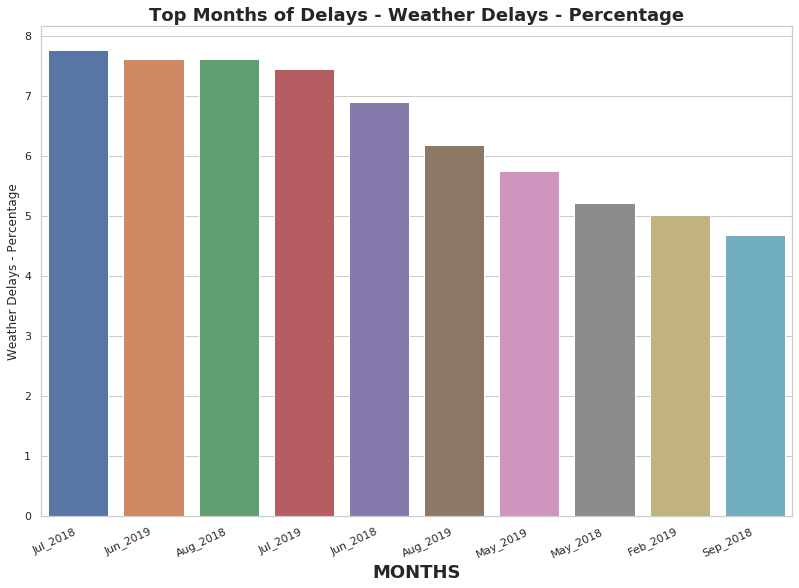

In [48]:
#Top Months with weather delays Percentage
MAWD1 = flights.groupby(['MY'])
MAWD1=MAWD1[['WEATHER_DELAY']].sum().add_prefix('%_of_')
MAWD1 = MAWD1.apply(lambda x:(x/x.sum()*100)).reset_index()
MAWD1 = MAWD1.sort_values(by=['%_of_WEATHER_DELAY'], ascending=False).reset_index()
MAWD1 = MAWD1.nlargest(10, '%_of_WEATHER_DELAY', keep='last')
MAWD1.drop(['index'], inplace=True, axis=1)

plt.figure(figsize=(12,9))
sns.barplot(x='MY', y='%_of_WEATHER_DELAY', data=MAWD1)
plt.ylabel('Weather Delays - Percentage')
plt.xlabel('MONTHS', fontdict={'fontsize': 18, 'fontweight': 'extra bold'})
plt.xticks(rotation=25,  ha='right')
plt.title('Top Months of Delays - Weather Delays - Percentage',fontdict={'fontsize': 18, 'fontweight': 'extra bold'})

Text(0.5, 1.0, 'Top Carriers With Weather Delays - Average Weather Delays')

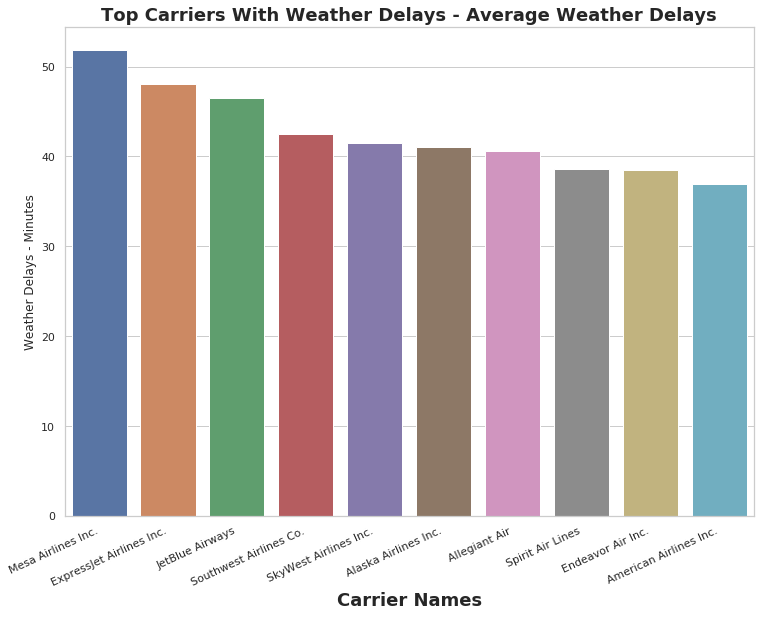

In [49]:
#Top Carrier with weather delays
plt.figure(figsize=(11,9))
sns.barplot(x='carrier_name', y='WEATHER_DELAY', data=CWD)
plt.ylabel('Weather Delays - Minutes')
plt.xlabel('Carrier Names',fontdict={'fontsize': 18, 'fontweight': 'extra bold'})
plt.xticks(rotation=25,  ha='right')
plt.title('Top Carriers With Weather Delays - Average Weather Delays',fontdict={'fontsize': 18, 'fontweight': 'extra bold'})

Text(0.5, 1.0, 'Top Airport With Weather Delays - Average Weather Delays')

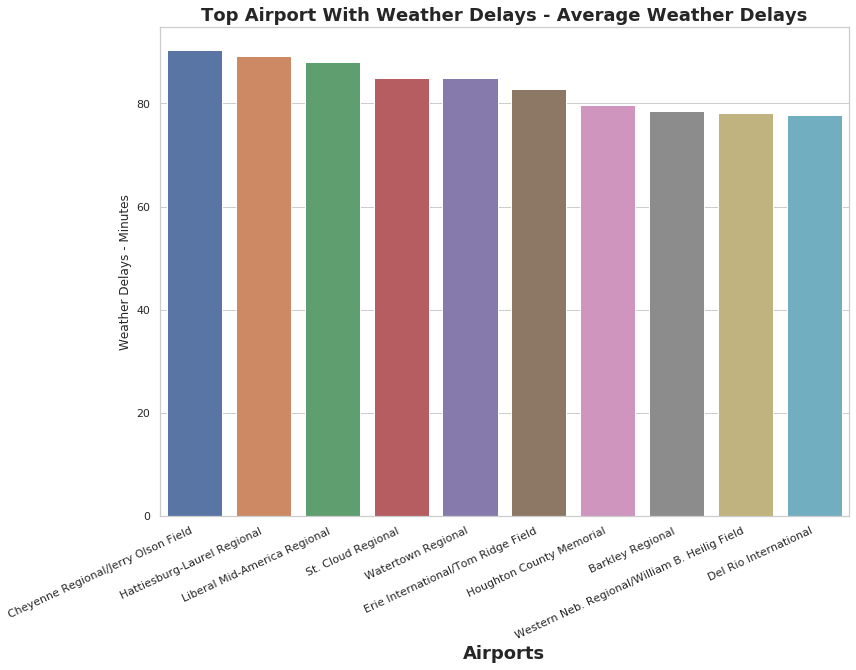

In [50]:
#Top Airports with weather delays
AWWD = WD_1.groupby(['ORIGIN_AirportName'])['WEATHER_DELAY'].mean().nlargest(10).reset_index()
plt.figure(figsize=(11,9))
sns.barplot(x='ORIGIN_AirportName', y='WEATHER_DELAY', data=AWWD)
plt.ylabel('Weather Delays - Minutes')
plt.xlabel('Airports',fontdict={'fontsize': 18, 'fontweight': 'extra bold'})
plt.xticks(rotation=25,  ha='right')
plt.title('Top Airport With Weather Delays - Average Weather Delays',fontdict={'fontsize': 18, 'fontweight': 'extra bold'})

Text(0.5, 1.0, 'Top Airport with Weather Delays - Weather Delays - Percentage')

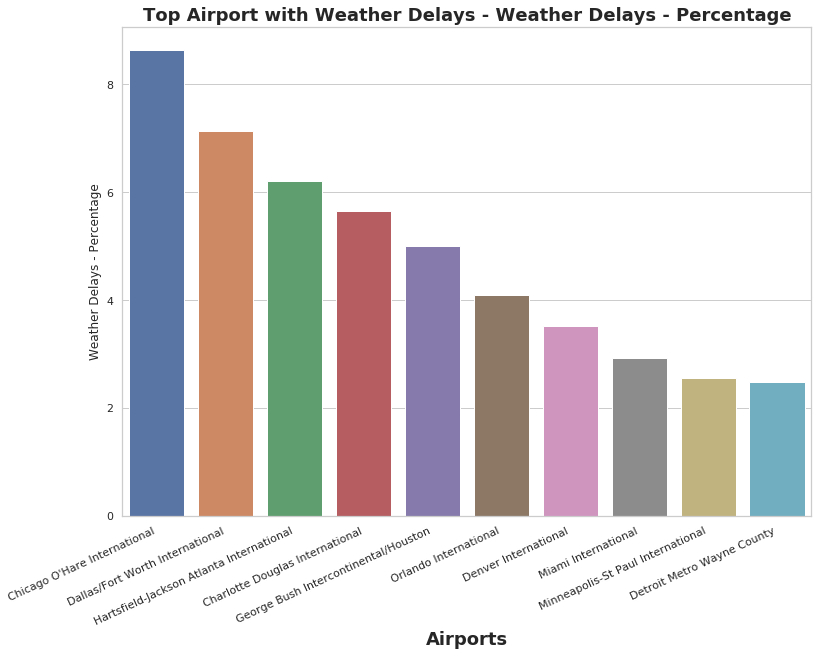

In [51]:
#Top Months with weather delays Percentage
AWWD1 = flights.groupby(['ORIGIN_AirportName'])
AWWD1=AWWD1[['WEATHER_DELAY']].sum().add_prefix('%_of_')
AWWD1 = AWWD1.apply(lambda x:(x/x.sum()*100)).reset_index()
AWWD1 = AWWD1.sort_values(by=['%_of_WEATHER_DELAY'], ascending=False).reset_index()
AWWD1 = AWWD1.nlargest(10, '%_of_WEATHER_DELAY', keep='last')
AWWD1.drop(['index'], inplace=True, axis=1)

plt.figure(figsize=(11,9))
sns.barplot(x='ORIGIN_AirportName', y='%_of_WEATHER_DELAY', data=AWWD1)
plt.ylabel('Weather Delays - Percentage')
plt.xlabel('Airports',fontdict={'fontsize': 18, 'fontweight': 'extra bold'})
plt.xticks(rotation=25,  ha='right')
plt.title('Top Airport with Weather Delays - Weather Delays - Percentage',fontdict={'fontsize': 18, 'fontweight': 'extra bold'})

Text(0.5, 1.0, 'Top Ten Carriers - Average Carrier Delays')

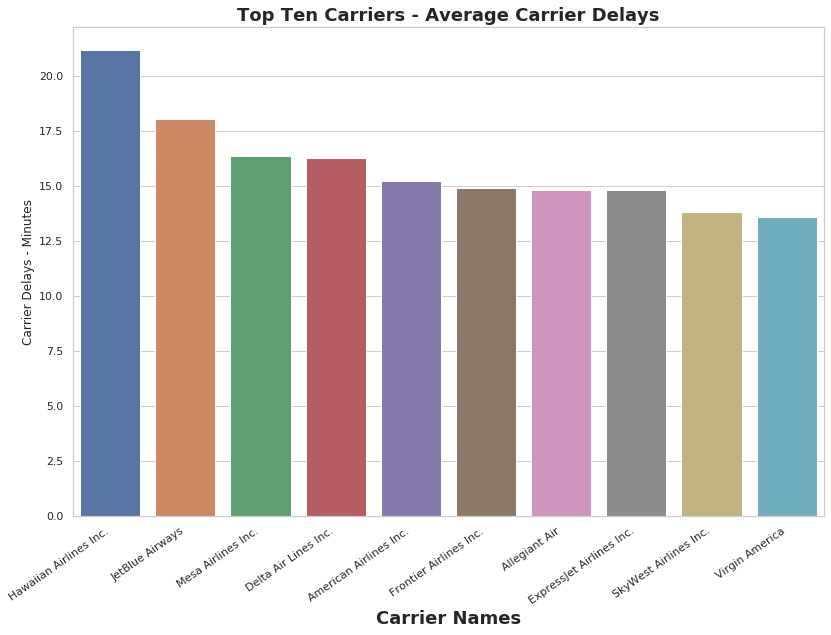

In [52]:
#Top Carrier with Carrier delays
#--> show values greater than
CCD = flights.groupby(['carrier_name'])['CARRIER_DELAY'].mean().nlargest(10).reset_index()
plt.figure(figsize=(12,9))
sns.barplot(x='carrier_name', y='CARRIER_DELAY', data=CCD)
plt.xlabel('Carrier Names', fontdict={'fontsize': 18, 'fontweight': 'extra bold'})
plt.ylabel('Carrier Delays - Minutes')


plt.xticks(rotation=35,  ha='right')
plt.title('Top Ten Carriers - Average Carrier Delays', fontdict={'fontsize': 18, 'fontweight': 'extra bold'})

Text(0.5, 1.0, 'Top Ten Airports - Average Carrier Delays')

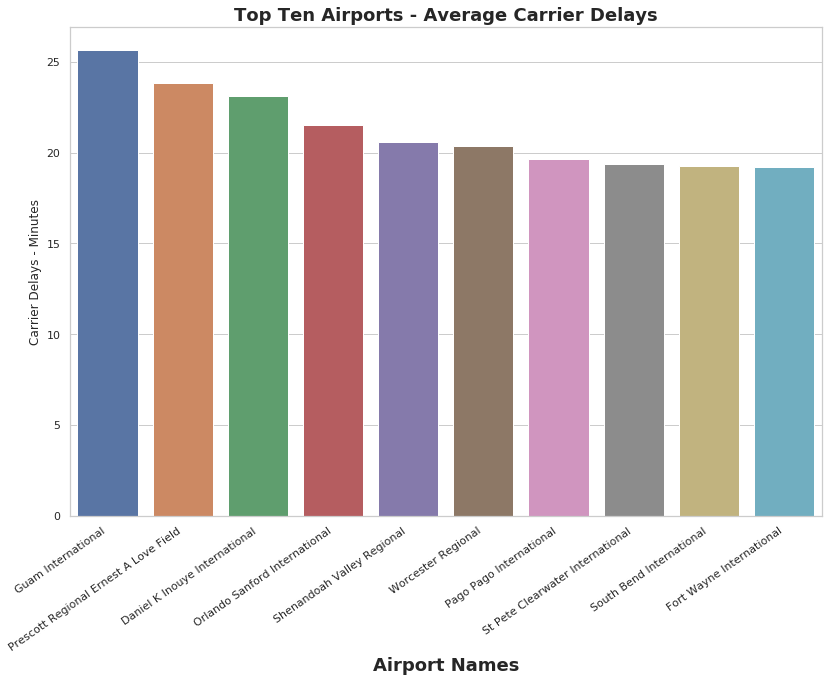

In [53]:
#Top Airports with Carrier delays
#--> show values greater than
CCD1 = flights.groupby(['ORIGIN_AirportName'])['CARRIER_DELAY'].mean().nlargest(10).reset_index()
plt.figure(figsize=(12,9))
sns.barplot(x='ORIGIN_AirportName', y='CARRIER_DELAY', data=CCD1)
plt.xlabel('Airport Names', fontdict={'fontsize': 18, 'fontweight': 'extra bold'})
plt.ylabel('Carrier Delays - Minutes')


plt.xticks(rotation=35,  ha='right')
plt.title('Top Ten Airports - Average Carrier Delays', fontdict={'fontsize': 18, 'fontweight': 'extra bold'})

Text(0.5, 1.0, 'Top Ten Carriers - Average Late Aircraft Delays')

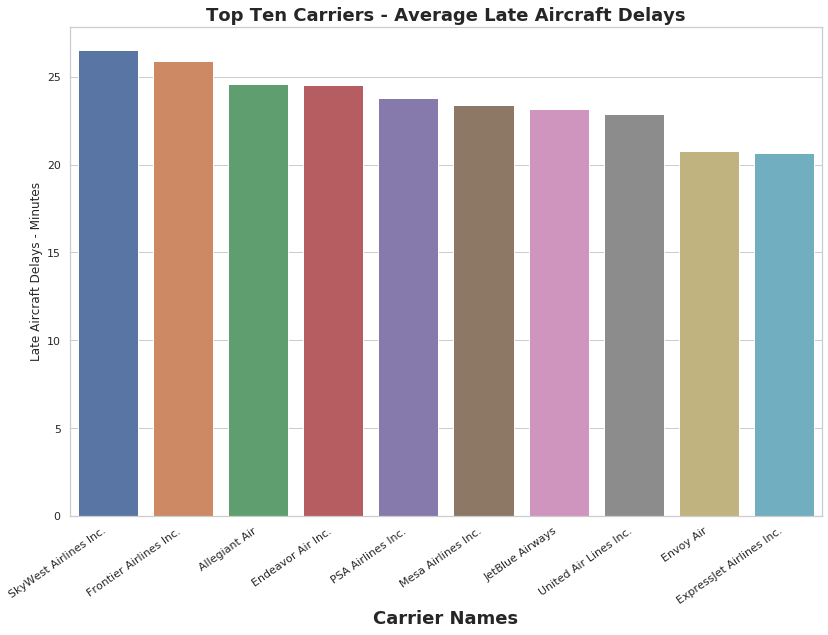

In [54]:
#Top Carrier with Late aircraft delays
#--> show values greater than
LCD = flights.groupby(['carrier_name'])['LATE_AIRCRAFT_DELAY'].mean().nlargest(10).reset_index()
plt.figure(figsize=(12,9))
sns.barplot(x='carrier_name', y='LATE_AIRCRAFT_DELAY', data=LCD)
plt.xlabel('Carrier Names', fontdict={'fontsize': 18, 'fontweight': 'extra bold'})
plt.ylabel('Late Aircraft Delays - Minutes')


plt.xticks(rotation=35,  ha='right')
plt.title('Top Ten Carriers - Average Late Aircraft Delays', fontdict={'fontsize': 18, 'fontweight': 'extra bold'})

Text(0.5, 1.0, 'Top Ten Airports - Average Late Aircraft Delays')

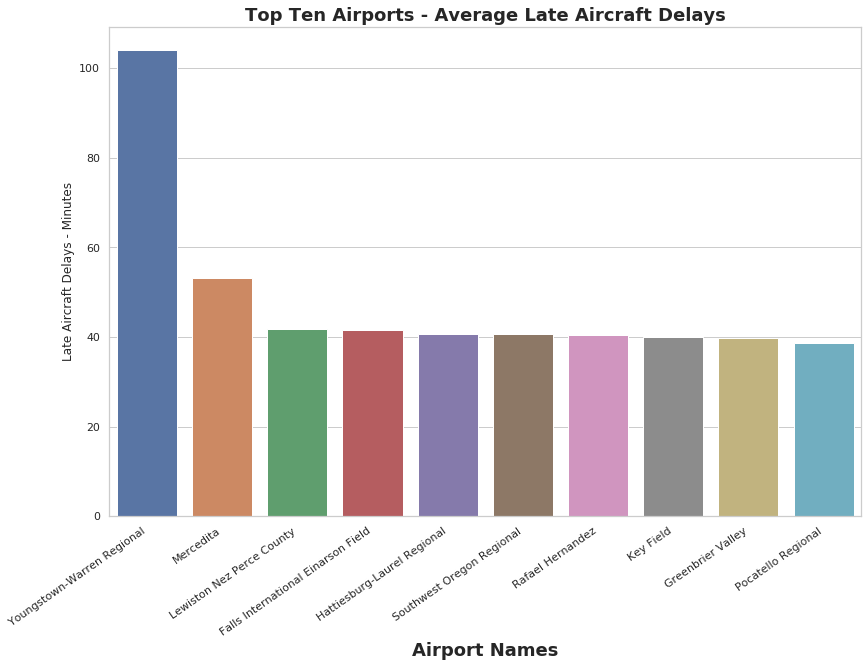

In [55]:
#Top Airports with Late aircraft delays
#--> show values greater than
LCD1 = flights.groupby(['ORIGIN_AirportName'])['LATE_AIRCRAFT_DELAY'].mean().nlargest(10).reset_index()
plt.figure(figsize=(12,9))
sns.barplot(x='ORIGIN_AirportName', y='LATE_AIRCRAFT_DELAY', data=LCD1)
plt.xlabel('Airport Names', fontdict={'fontsize': 18, 'fontweight': 'extra bold'})
plt.ylabel('Late Aircraft Delays - Minutes')


plt.xticks(rotation=35,  ha='right')
plt.title('Top Ten Airports - Average Late Aircraft Delays', fontdict={'fontsize': 18, 'fontweight': 'extra bold'})

In [56]:
# Create a Basic statistical description of airlines
#__________________________________________________________________
# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#_______________________________________________________________
# Creation of a dataframe with statitical infos on each airline:
global_stats = flights['DEP_DELAY'].groupby(flights['OP_UNIQUE_CARRIER']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
#global_stats.reset_index(inplace=True, drop=True) # Use if need be

#global_stats.columns rename
global_stats.index.names = ['carrier_name']
global_stats

,min,max,count,mean
carrier_name,,,,
VX,0.0000,180.0000,3168.0000,43.1755
HA,0.0000,180.0000,13695.0000,29.4939
G4,0.0000,180.0000,35086.0000,48.6183
F9,0.0000,180.0000,54047.0000,54.5010
NK,0.0000,180.0000,54878.0000,51.9547
EV,0.0000,180.0000,64043.0000,50.5063
AS,0.0000,180.0000,65250.0000,40.6040
9E,0.0000,180.0000,73631.0000,52.5406
YV,0.0000,180.0000,74405.0000,48.8266


In [57]:
flights.DEP_DELAY.describe()

count   2265737.0000
mean         47.6724
std          41.5288
min           0.0000
25%          17.0000
50%          37.0000
75%          69.0000
max         180.0000
Name: DEP_DELAY, dtype: float64

In [58]:
#CREATE DATAFRAME TO USE FOR DIFFERENT GRAPH VIEW
abbr_companies = flights[['OP_CARRIER','carrier_name']]
abbr_companies = abbr_companies.drop_duplicates()
abbr_companies.reset_index(inplace=True, drop=True)

#Stripping all trailing empty spaces in a needed columns of dataframe
abbr_companies['OP_CARRIER'] = abbr_companies['OP_CARRIER'].map(lambda x: x.strip())
abbr_companies['carrier_name'] = abbr_companies['carrier_name'].map(lambda x: x.strip())

abbr_companies

,OP_CARRIER,carrier_name
0,WN,Southwest Airlines Co.
1,DL,Delta Air Lines Inc.
2,B6,JetBlue Airways
3,MQ,Envoy Air
4,YV,Mesa Airlines Inc.
5,EV,ExpressJet Airlines Inc.
6,OO,SkyWest Airlines Inc.
7,YX,Republic Airline
8,9E,Endeavor Air Inc.
9,OH,PSA Airlines Inc.


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


--- 0.10 minutes runtime ---


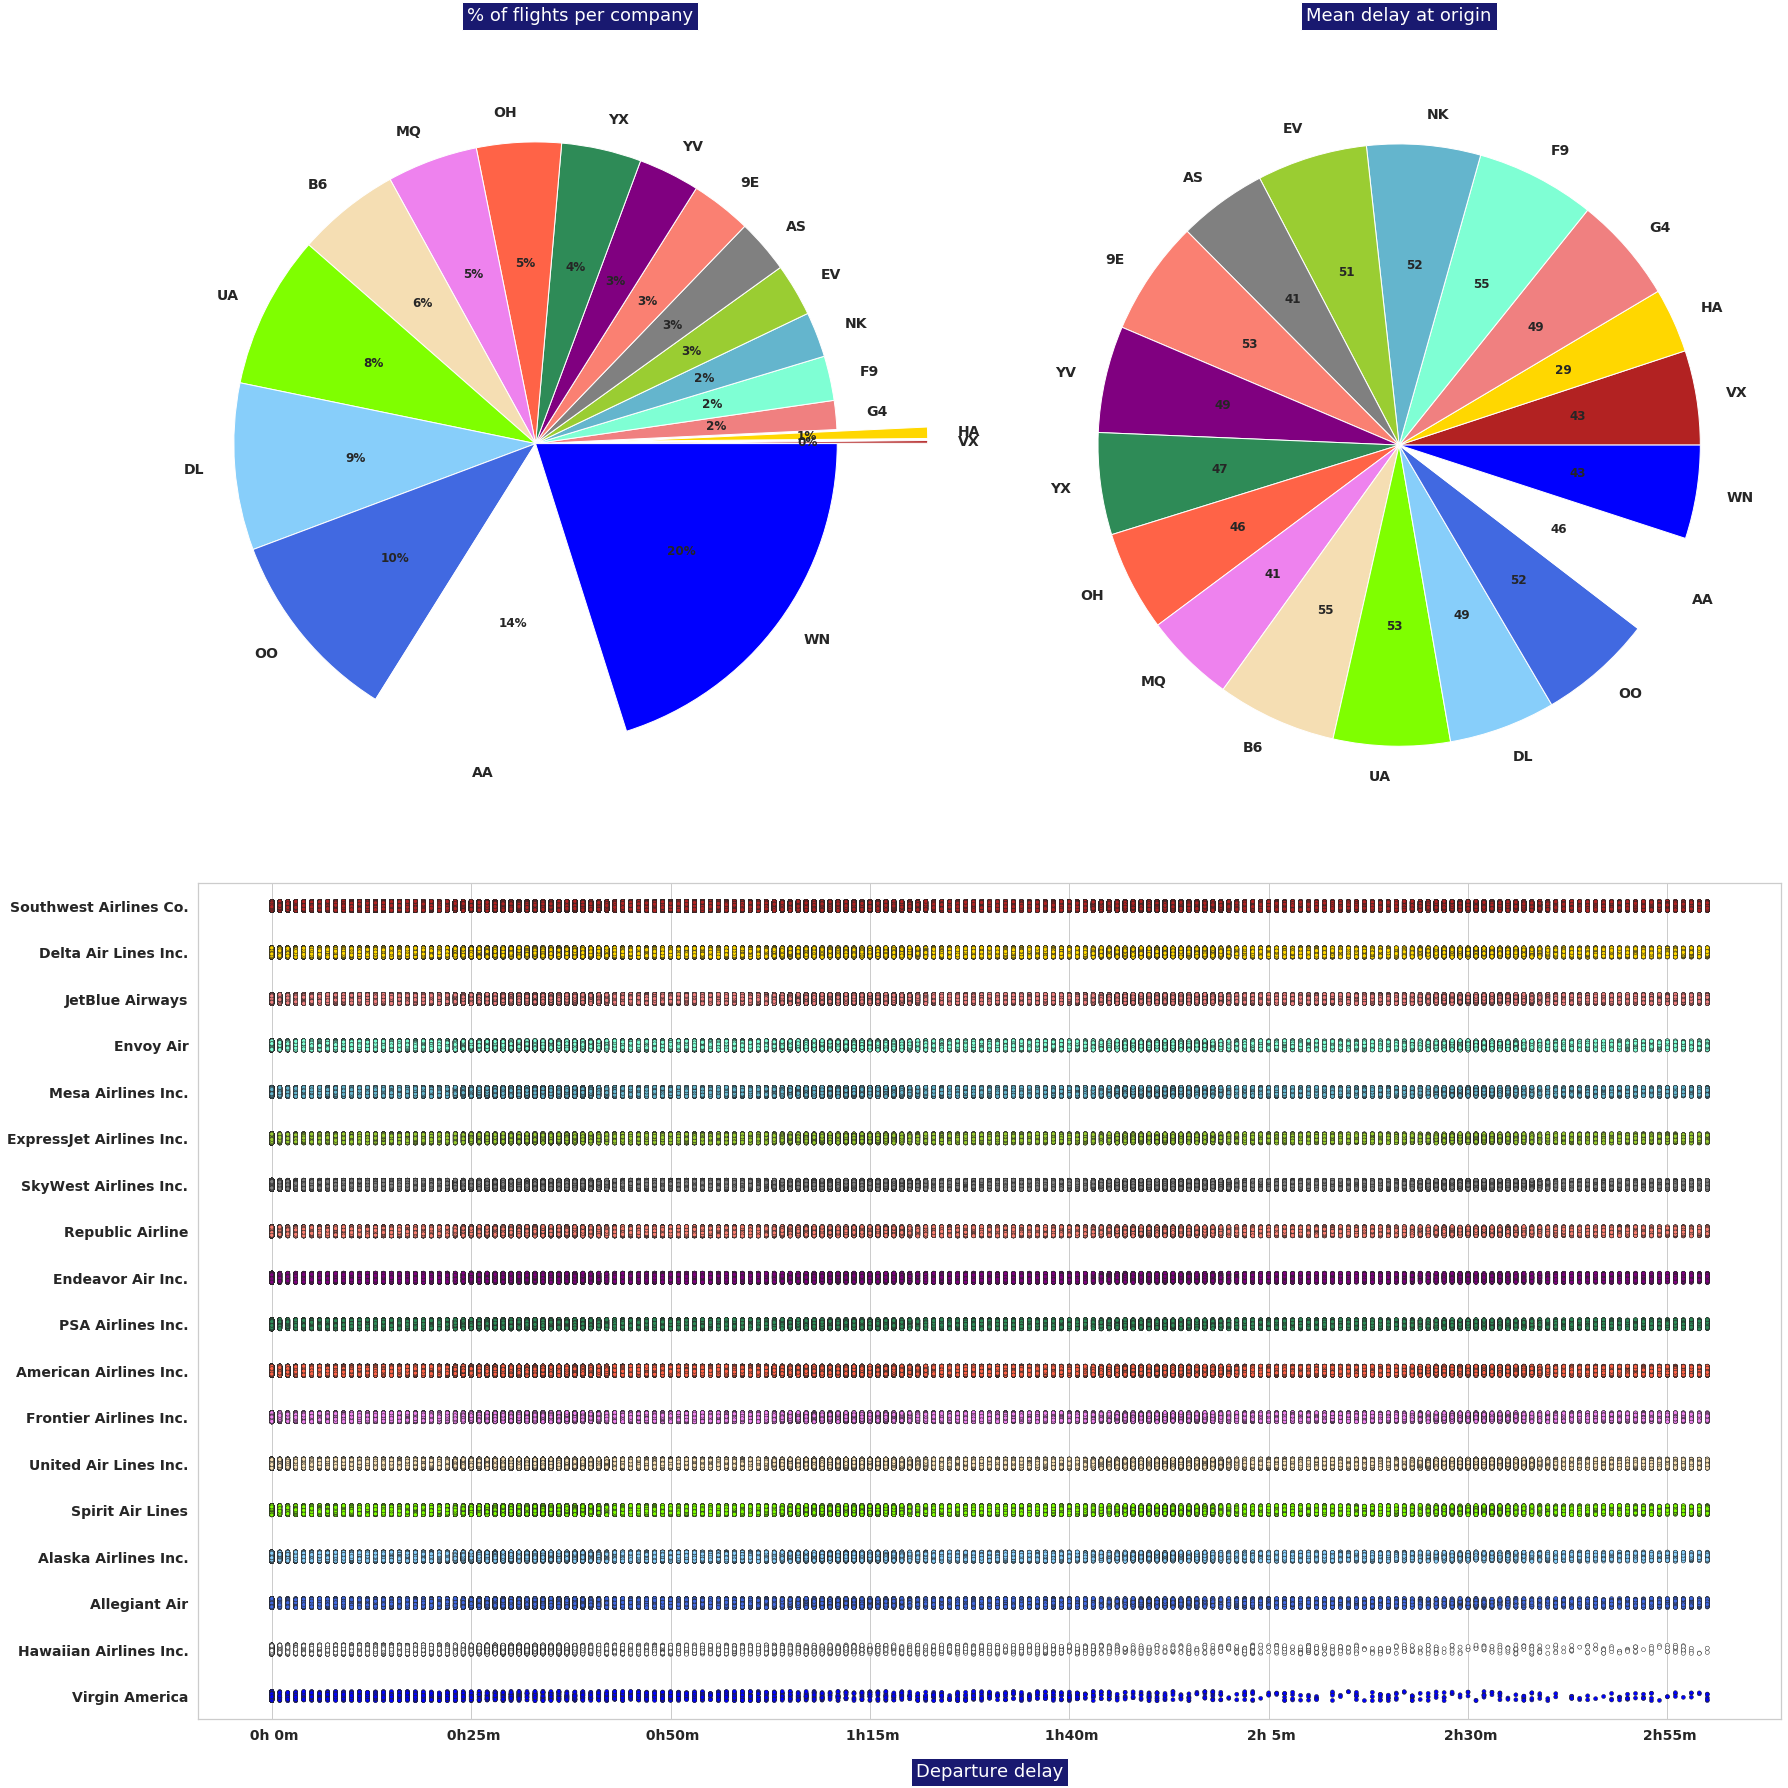

In [59]:
start_time = time.time()
#(code below)


#PLOTTTING OF PIE CHART WITH PERCENTAGE IF FKIGHT PER COMPANY AND MEAN OF DELAY AT ORGIN DISPLAYED
font = {'family' : 'normal', 'weight' : 'bold', 'size'   : 12}
mpl.rc('font', **font)
import matplotlib.patches as mpatches
#__________________________________________________________________
# I extract a subset of columns and redefine the airlines labeling 
df2 = flights.loc[:, ['carrier_name', 'DEP_DELAY']]
df2['carrier_name'] = df2['carrier_name'].replace(abbr_companies)
#________________________________________________________________________
colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey','salmon','purple',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue','white','blue']
#___________________________________
fig = plt.figure(1, figsize=(25,25))
gs=GridSpec(2,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 
ax3=fig.add_subplot(gs[1,:]) 
#------------------------------
# Pie chart nº1: nb of flights
#------------------------------
labels = [s for s in  global_stats.index]
sizes  = global_stats['count'].values
explode = [0.3 if sizes[i] < 20000 else 0.0 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode,
                                labels=labels, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax1.axis('equal')
ax1.set_title('% of flights per company', bbox={'facecolor':'midnightblue', 'pad':5},
              color = 'w',fontsize=18)

#----------------------------------------
# Pie chart nº2: mean delay at departure
#----------------------------------------
sizes  = global_stats['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels,
                                colors = colors, shadow=False, startangle=0,
                                autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax2.axis('equal')
ax2.set_title('Mean delay at origin', bbox={'facecolor':'midnightblue', 'pad':5},
              color='w', fontsize=18)
#------------------------------------------------------
# striplot with all the values reported for the delays
#___________________________________________________________________
# I redefine the colors for correspondance with the pie charts
colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey','salmon','purple',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue','white','blue']
#___________________________________________________________________
ax3 = sns.stripplot(y="carrier_name", x="DEP_DELAY", size = 4, palette = colors,
                    data=df2, linewidth = 0.5,  jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax3.get_xticks()])
plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)
#________________________
plt.tight_layout(w_pad=3) 

print("--- %.2f minutes runtime ---"% ((time.time() - start_time)/60))

First pie chart gives the percentage of flights per airline carrier, this shows some disparity between the carriers. 
- For instance, Southwest Airlines accounts for ∼18% of the flights which is similar to the number of flights chartered by the 7 smallest airlines. 
- The second pie chart, shows the differences among airlines are less pronounced. 
    - Excluding Hawaiian Airlines and Alaska Airlines that report lower mean delays than their counterparts. 
- As of 2018 and 2019, all airlines run about 45 mins delay on average. This seems to be the new norm.

At the bottom, the chart is a measure of all the delays from January 2018. This shows the relative homogeneity that appeared in the second pie chart. 

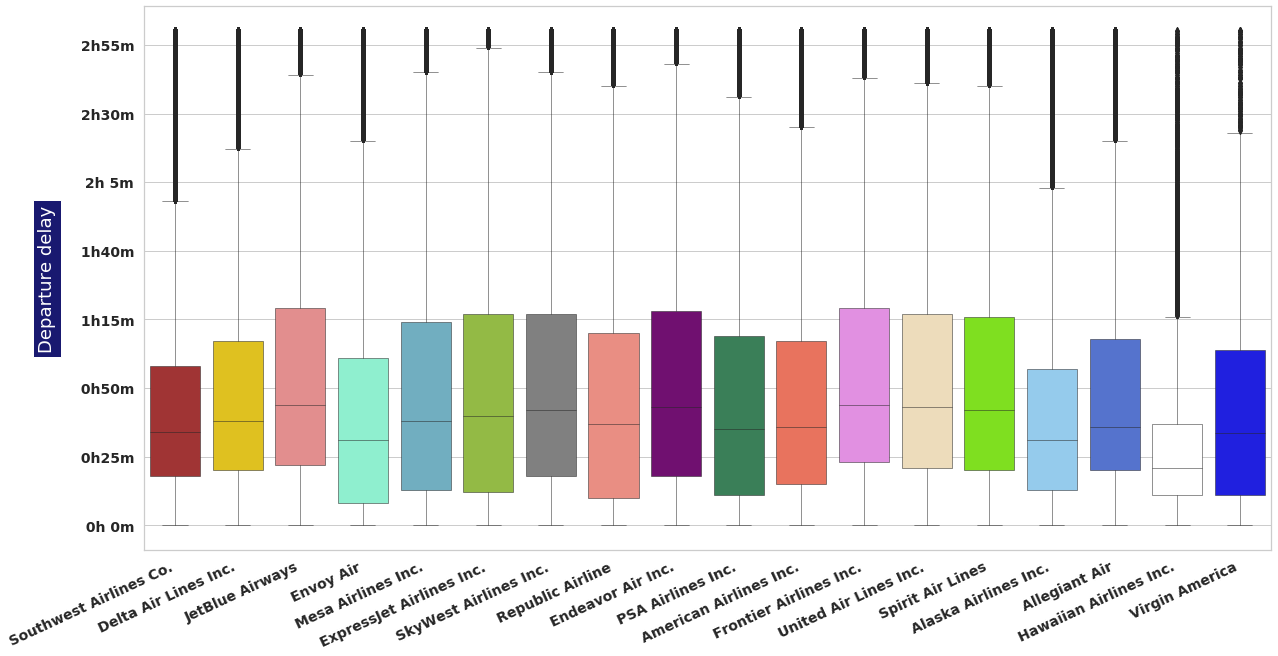

In [60]:
#-- Need to change outliers
# -- look into 75% quatret - see what/how many are above
plt.figure(figsize=(18,10))
ax3 = sns.boxplot(x="carrier_name", y="DEP_DELAY", palette = colors,
                    data=df2, linewidth = 0.5)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_yticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(x) for x in divmod(x,60)])
                         for x in ax3.get_yticks()])
plt.ylabel('Departure delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
plt.xticks(rotation=25,  ha='right')
ax3.xaxis.label.set_visible(False)

CPU times: user 26 µs, sys: 2 µs, total: 28 µs
Wall time: 40.8 µs
CPU times: user 944 ms, sys: 2.9 ms, total: 947 ms
Wall time: 950 ms


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


CPU times: user 731 ms, sys: 11.9 ms, total: 743 ms
Wall time: 743 ms


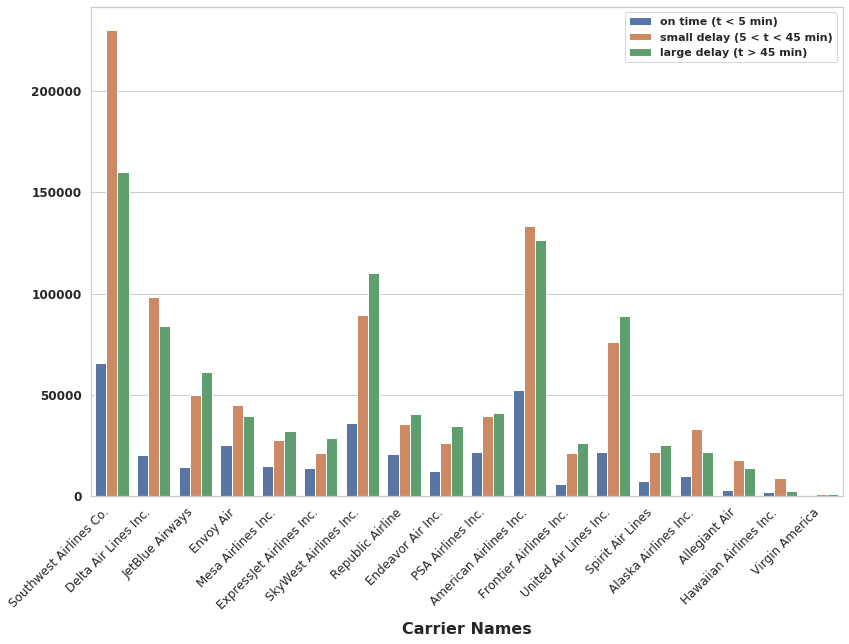

In [61]:
#_____________________________________________
# Function that define how delays are grouped
%time delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
%time flights['DELAY_LEVEL'] = flights['DEP_DELAY'].apply(delay_type)
#____________________________________________________
fig = plt.figure(1, figsize=(12,9))
%time ax = sns.countplot(x="carrier_name", hue='DELAY_LEVEL', data=flights)
#____________________________________________________________________________________
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 45, ha='right');
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Carrier Names', fontsize=16, weight = 'bold', labelpad=10)
#________________
# Set the legend
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

In [62]:
# creating new variables and renaming 

#'YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH',
display(flights.shape)
flights['DepDate'] = pd.to_datetime(flights.YEAR*10000+flights.MONTH*100+flights.DAY_OF_MONTH,format='%Y%m%d')

#Status represents whether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)
%time
for dataset in flights:
    flights.loc[flights['ARR_DELAY'] <= 15, 'Status'] = 0
    flights.loc[flights['ARR_DELAY'] >= 15, 'Status'] = 1
    flights.loc[flights['ARR_DELAY'] >= 60, 'Status'] = 2
    flights.loc[flights['DIVERTED'] == 1, 'Status'] = 3
    flights.loc[flights['CANCELLED'] == 1, 'Status'] = 4

flights['Status1']=flights.Status
display(flights.shape)

(2265737, 68)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.01 µs


(2265737, 71)

In [63]:
#Create column to use for chart
for dataset in flights:
    flights.loc[flights['ARR_DELAY'] <= 15, 'Status1'] = 'On Time'
    flights.loc[flights['ARR_DELAY'] >= 15, 'Status1'] = 'Slightly Delayed'
    flights.loc[flights['ARR_DELAY'] >= 60, 'Status1'] = 'Highly Delayed'
    flights.loc[flights['DIVERTED'] == 1, 'Status1'] = 'Diverted'
    flights.loc[flights['CANCELLED'] == 1, 'Status1'] = 'Cancelled'
    
display(flights.shape)

(2265737, 71)

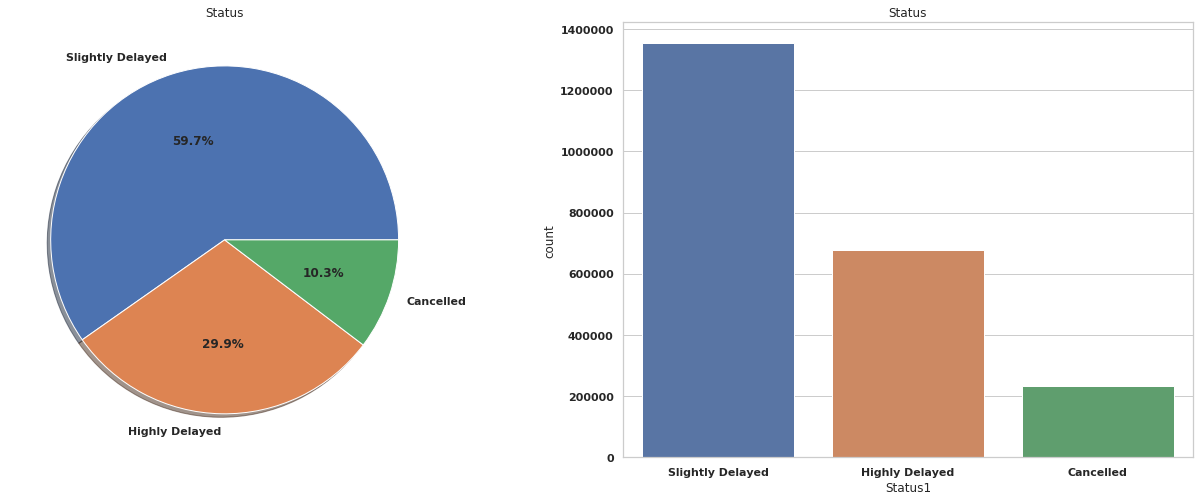

--- 0.02 minutes runtime ---


In [64]:
start_time = time.time()
#(code below)

f,ax=plt.subplots(1,2,figsize=(20,8))
flights['Status1'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Status')
ax[0].set_ylabel('')
sns.countplot('Status1',order = flights['Status1'].value_counts().index, data=flights,ax=ax[1])
ax[1].set_title('Status')
plt.show()

print("--- %.2f minutes runtime ---"% ((time.time() - start_time)/60))
#print('Status represents if the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)')

array(['E', 'B', 'A', 'C', 'D'], dtype=object)

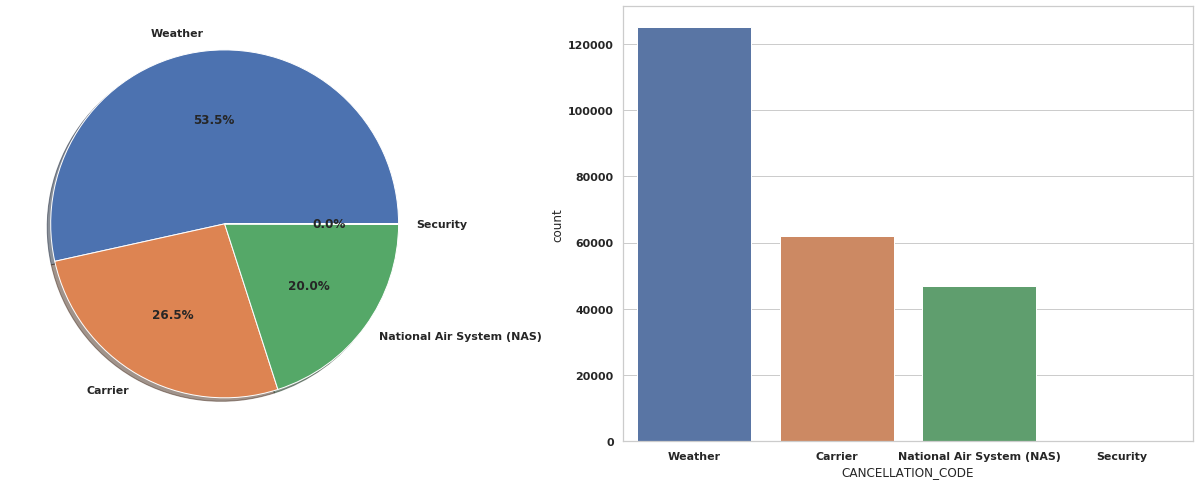

--- 0.02 minutes runtime ---


In [65]:
start_time = time.time()
#(code below)

display(flights.CANCELLATION_CODE.unique())
#Cancelled flights
CancFlights = flights[(flights.Status1 == 'Cancelled')]
#Rename/Replace values in column
CancFlights.CANCELLATION_CODE.replace(['A','B','C','D'], ['Carrier','Weather','National Air System (NAS)','Security'], inplace=True)
f,ax=plt.subplots(1,2,figsize=(20,8))
CancFlights['CANCELLATION_CODE'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_ylabel('')
sns.countplot('CANCELLATION_CODE', order = CancFlights['CANCELLATION_CODE'].value_counts().index, data=CancFlights, ax=ax[1])
plt.show()

print("--- %.2f minutes runtime ---"% ((time.time() - start_time)/60))
#print('A = Carrier, B = Weather, C = National Air System (NAS), D = Security')
#add names to a, b, c

In [66]:
#go.Figure(data=[go.Pie( values=CancFlights['CANCELLATION_CODE'].value_counts(), hole=.3)])
labels = ['Carrier','Weather','National Air System (NAS)','Security']
values = [26.5, 53.5, 20, 0.0261]

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5, pull=[0, 0.15, 0.0, 0])])
fig.show()

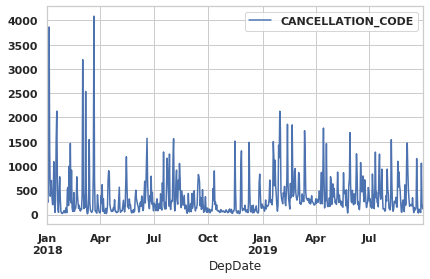

In [69]:
CancFlights[['DepDate','CANCELLATION_CODE']].groupby(['DepDate']).count().plot()
plt.show()

Beginning of 2018, January and March time frame, there were major cancellations. 
- Doing a bit of research and it shows that winter was unusual, with strong snow storms shutting down airports across the country. coast-to-coast severe winter weather.
- Repeat of this is seen in winter months of 2019, although not as severe, there were more instances of strong enough snow/ice related storms from end of Jan 2019 to March

In [70]:
print("Number of airports: {}".format(len(flights['ORIGIN_AIRPORT_ID'].unique())))
print("Number of Carriers: {}".format(len(flights['OP_CARRIER_AIRLINE_ID'].unique())))
print("Number of Cities: {}".format(len(flights['ORIGIN_CITY_NAME'].unique())))
print("Number of States: {}".format(len(flights['ORIGIN_STATE_ABR'].unique())))

Number of airports: 362
Number of Carriers: 18
Number of Cities: 355
Number of States: 52


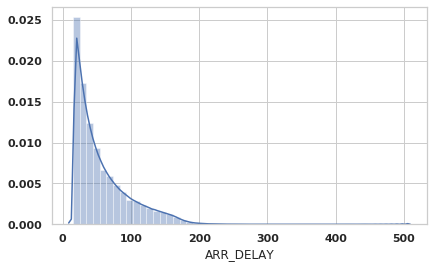

Skewness: 1.364892
Kurtosis: 1.531876


In [71]:
#Delayed Flights
Delayedflights = flights[(flights.Status >= 1) &(flights.Status < 3)]
#histogram
sns.distplot(Delayedflights['ARR_DELAY'])
plt.show()
#skewness and kurtosis
print("Skewness: %f" % Delayedflights['ARR_DELAY'].skew())
print("Kurtosis: %f" % Delayedflights['ARR_DELAY'].kurt())

- Based on the histogram and by the skewness and kurtosis indexes,
    - that delays are mostly located on the left side of the graph,with a long tail to the right. 
- The majority of delays are short, and the longer delays, while unusual, are more heavy loaded in time')

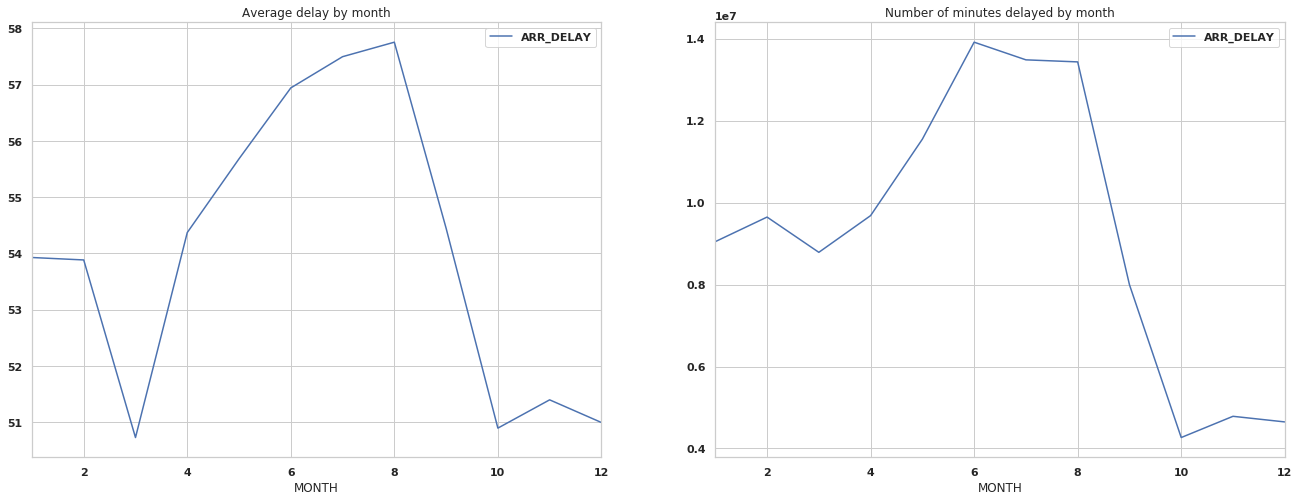

Delays focused on Feburary, June and peaking at that time
Delays stay high during the summer months and drops beginning of fall


In [72]:
f,ax=plt.subplots(1,2,figsize=(20,8))
Delayedflights[['MONTH','ARR_DELAY']].groupby(['MONTH']).mean().plot(ax=ax[0])
ax[0].set_title('Average delay by month')
Delayedflights[['MONTH','ARR_DELAY']].groupby(['MONTH']).sum().plot(ax=ax[1])
ax[1].set_title('Number of minutes delayed by month')
plt.show()

print('Delays focused on Feburary, June and peaking at that time')
print('Delays stay high during the summer months and drops beginning of fall')

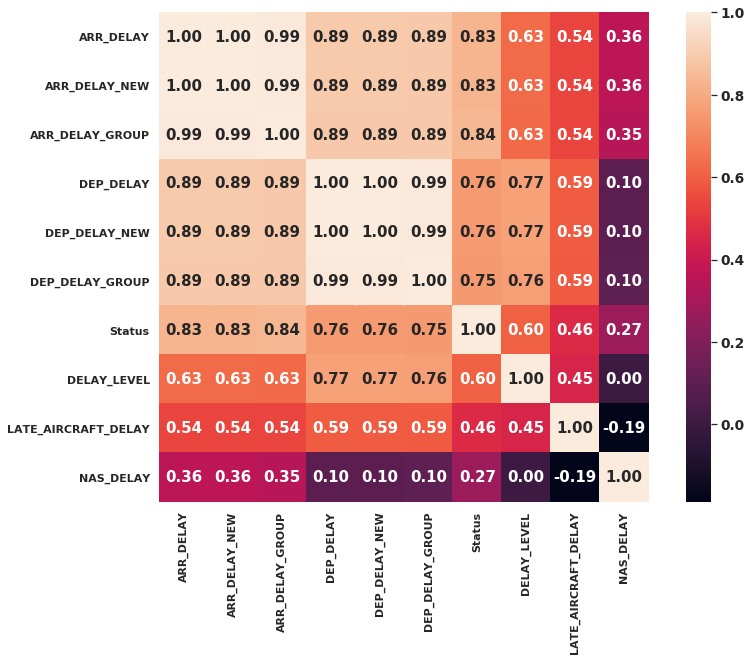

The correlation matrix identifies three main variables for delays: Late Aircraft Delay, Carrier Delay and Dep Delay.


In [73]:
delcorrmat = Delayedflights.corr()

k = 10 #number of variables for heatmap
f, ax = plt.subplots(figsize=(12, 9))
cols = delcorrmat.nlargest(k, 'ARR_DELAY')['ARR_DELAY'].index
cm = np.corrcoef(Delayedflights[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
print('The correlation matrix identifies three main variables for delays: Late Aircraft Delay, Carrier Delay and Dep Delay.')

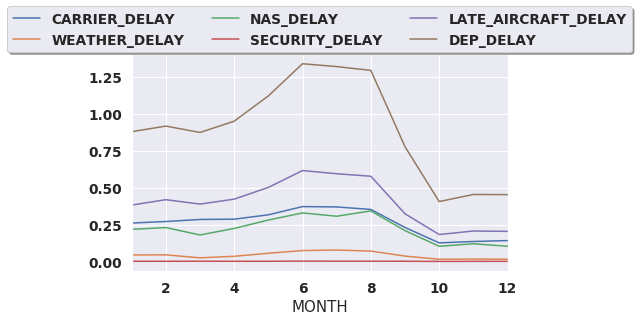

The graph colaborates the assumption above, showing how those three variables create most of delays during the year.


In [74]:
df1 = Delayedflights.filter(['MONTH','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY', 'DEP_DELAY'], axis=1)
df1 = df1.groupby('MONTH')['CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY', 'DEP_DELAY'].sum().plot()
df1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fancybox=True, shadow=True)
plt.show()

print('The graph colaborates the assumption above, showing how those three variables create most of delays during the year.')

In [0]:
#Create a copy of data fram and remove duplicates for map
Flight_Map = flights.copy()
Flight_Map = Flight_Map.groupby(['ORIGIN_STATE_NM', 'carrier_name', 'Status']).apply(lambda x: x.sort_values('ORIGIN_elevation_ft')).reset_index(drop=True)


In [0]:
#Drop duplicate if any
#Drop the duplicate by column:
Flight_Map.drop_duplicates(['ORIGIN_STATE_NM'], keep='last')
#http://www.datasciencemadesimple.com/delete-drop-duplicate-row-dataframe-python-pandas/

In [0]:
fig = go.Figure(data=go.Choropleth(
    locations = Flight_Map['ORIGIN_STATE_NM'],
    z = Flight_Map['ORIGIN_elevation_ft'],
    text = Flight_Map['ORIGIN_CITY_NAME'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = 'ft',
    colorbar_title = '<br>Elevation Ft<br>',
))

fig.update_layout(
    title_text='Flights Data',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        #text='Source: <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
        #    CIA World Factbook</a>',
        showarrow = False
    )]
)

fig.show()


In [0]:
fig = go.Figure(data=go.Choropleth(
    locations= flights['ORIGIN_STATE_NM'], # Spatial coordinates
    z = flights['DEST_elevation_ft'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Viridis',
    colorbar_title = "Elevation ft",
))

fig.update_layout(
    title_text = 'Airport Elevation area<br>(Hover for breakdown)',
    #geo_scope='usa', # limite map scope to USA
)

fig.show()

In [80]:
import descartes
!pip install geopandas
import geopandas as gpd
from shapely.geometry import Point, Polygon

     |████████████████████████████████| 921kB 9.6MB/s 
     |████████████████████████████████| 11.8MB 199kB/s 
     |████████████████████████████████| 10.1MB 54.1MB/s 
